In [1]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c982a11d-fe4f-483c-8852-a81a93a5a414',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


#NOTE
# I had to go in Anaconda terminal and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in it to change the data rate limit so that i can pull all of the data.
# If it doesn't work try opening the notebook again aftre shutting it down.

{'status': {'timestamp': '2023-09-15T07:42:49.594Z', 'error_code': 0, 'error_message': None, 'elapsed': 70, 'credit_count': 1, 'notice': None, 'total_count': 9123}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10469, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd


# This will help you see all the columns(no column would be hidden).
pd.set_option('display.max_Columns', None)

# This will normalize the data and will make it all pretty in a database.(For Rows)
pd.set_option('display.max_Rows', None)

In [4]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-09-15T07:42:49.594Z,0,None,70,1,None,9123


In [5]:
# This will normalize the data and will make it all pretty in a database.(For Columns)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc = True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948596e+07,1.948596e+07,False,NaN,1,NaN,NaN,None,2023-09-15T07:41:00.000Z,26584.488749,1.274048e+10,-8.3169,0.002288,1.005272,1.278326,-8.823142,-12.214880,-0.107030,5.180243e+11,49.1268,5.582743e+11,None,2023-09-15T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:42:50.242246+00:00
1,1027,Ethereum,ETH,ethereum,7386,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202228e+08,1.202228e+08,True,NaN,2,NaN,NaN,None,2023-09-15T07:41:00.000Z,1629.367721,4.785684e+09,-14.2019,-0.017071,0.576035,-1.011348,-10.720058,-15.643157,-6.581954,1.958872e+11,18.5784,1.958872e+11,None,2023-09-15T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:42:50.242246+00:00
2,825,Tether USDt,USDT,tether,62295,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.303962e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-15T07:41:00.000Z,1.000129,2.006275e+10,-7.2738,-0.011473,0.005025,0.054479,0.133045,-0.023072,0.068034,8.305035e+10,7.8764,8.544824e+10,None,2023-09-15T07:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-15 07:42:50.242246+00:00
3,1839,BNB,BNB,bnb,1622,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538486e+08,1.538486e+08,False,NaN,4,NaN,NaN,None,2023-09-15T07:41:00.000Z,212.386107,3.424018e+08,-2.8168,-0.152726,0.145612,-2.052939,-9.510666,-12.500853,-14.045373,3.267531e+10,3.0990,3.267531e+10,None,2023-09-15T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:42:50.242246+00:00
4,52,XRP,XRP,xrp,1085,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.317540e+10,9.998843e+10,False,NaN,5,NaN,NaN,None,2023-09-15T07:41:00.000Z,0.495013,8.973026e+08,2.8727,-0.489178,2.840312,-1.624596,-17.468307,-34.087788,3.142069,2.632250e+10,2.4964,4.950128e+10,None,2023-09-15T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:42:50.242246+00:00
5,3408,USD Coin,USDC,usd-coin,14083,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.613672e+10,2.613672e+10,False,NaN,6,NaN,NaN,None,2023-09-15T07:41:00.000Z,1.000126,2.979740e+09,-11.1013,-0.021201,-0.001225,0.005081,-0.006907,0.002345,0.004324,2.614002e+10,2.4792,2.614002e+10,None,2023-09-15T07:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-15 07:42:50.242246+00:00
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.509945e+10,3.616798e+10,False,NaN,7,NaN,NaN,None,2023-09-15T07:41:00.000Z,0.251606,1.081308e+08,-0.4138,-0.242851,1.652437,-2.538628,-9.772475,-20.729049,-6.671992,8.831218e+09,0.8376,1.132225e+10,None,2023-09-15T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:42:50.242246+00:00
7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.410138e+11,1.410138e+11,True,NaN,8,NaN,NaN,None,2023-09-15T07:41:00.000Z,0.061921,1.736003e+08,-8.9377,-0.230159,0.841741,-2.729648,-12.306037,-12.769273,-1.044223,8.731783e+09,0.8281,8.731783e+09,None,2023-09-15T07:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:42:50.242246+00:00
8,5426,Solana,SOL,solana,525,2020-04-10T00:00:00.000Z,"

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'c982a11d-fe4f-483c-8852-a81a93a5a414',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
            print(e)


#NOTE
# I had to go in Anaconda terminal and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in it to change the data rate limit so that i can pull all of the data.
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc = True)
    df
    
    if not os.path.isfile(r'/Users/Dhruv/Desktop/PROJECTS/API.csv'):
        df.to_csv(r'/Users/Dhruv/Desktop/PROJECTS/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/Dhruv/Desktop/PROJECTS/API.csv', mode = 'a', header = False)
# If it doesn't work try opening the notebook again aftre shutting it down.

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully.')
    sleep(15) # It will sleep for 15 seconds.   
exit()

API Runner Completed Successfully.
API Runner Completed Successfully.
API Runner Completed Successfully.
API Runner Completed Successfully.
API Runner Completed Successfully.


KeyboardInterrupt: 

In [8]:
df1 = pd.read_csv(r'/Users/Dhruv/Desktop/PROJECTS/API.csv')
df1

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.948405e+07,1.948405e+07,False,NaN,1,NaN,NaN,NaN,2023-09-13T09:06:00.000Z,25948.306056,1.592816e+10,-13.7158,0.130662,0.650570,0.797983,-11.690559,-14.447151,4.300146,5.055781e+11,48.9581,5.449144e+11,NaN,2023-09-13T09:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 09:08:41.233276+00:00
1,1,1027,Ethereum,ETH,ethereum,7364,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202223e+08,1.202223e+08,True,NaN,2,NaN,NaN,NaN,2023-09-13T09:06:00.000Z,1592.209911,5.910994e+09,-31.4032,0.289339,0.888806,-2.385714,-13.785930,-17.932318,-2.524608,1.914191e+11,18.5361,1.914191e+11,NaN,2023-09-13T09:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 09:08:41.233276+00:00
2,2,825,Tether USDt,USDT,tether,61935,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.303173e+10,8.543720e+10,True,NaN,3,NaN,NaN,NaN,2023-09-13T09:06:00.000Z,1.000072,2.414626e+10,-15.7372,0.016863,0.006708,0.072989,0.132751,-0.030551,0.428099,8.303772e+10,8.0409,8.544336e+10,NaN,2023-09-13T09:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-13 09:08:41.233276+00:00
3,3,1839,BNB,BNB,bnb,1618,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538489e+08,1.538489e+08,False,NaN,4,NaN,NaN,NaN,2023-09-13T09:06:00.000Z,211.381097,3.926311e+08,-23.3725,0.492385,0.970816,-1.494289,-12.077593,-15.825097,-10.231695,3.252074e+10,3.1491,3.252074e+10,NaN,2023-09-13T09:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 09:08:41.233276+00:00
4,4,3408,USD Coin,USDC,usd-coin,14062,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.620431e+10,2.620431e+10,False,NaN,5,NaN,NaN,NaN,2023-09-13T09:06:00.000Z,1.000277,3.738362e+09,-17.7192,0.018906,-0.006198,0.034257,0.030498,0.028658,0.056840,2.621156e+10,2.5382,2.621156e+10,NaN,2023-09-13T09:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-13 09:08:41.233276+00:00
5,5,52,XRP,XRP,xrp,1068,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,6,NaN,NaN,NaN,2023-09-13T09:06:00.000Z,0.478052,1.038864e+09,-16.4062,0.472368,1.186670,-4.534705,-23.825250,-33.791019,1.504201,2.537644e+10,2.4573,4.780516e+10,NaN,2023-09-13T09:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 09:08:41.233276+00:00
6,6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.509819e+10,3.616798e+10,False,NaN,7,NaN,NaN,NaN,2023-09-13T09:06:00.000Z,0.247134,1.219653e+08,-13.4013,0.620742,0.540749,-3.435968,-14.930217,-26.398038,-2.814059,8.673961e+09,0.8400,1.112104e+10,NaN,2023-09-13T09:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 09:08:41.233276+00:00
7,7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.409878e+11,1.409878e+11,True,NaN,8,NaN,NaN,NaN,2023-09-13T09:06:00.000Z,0.061164,2.235596e+08,-16.9304,0.468495,0.335131,-4.322715,-18.388758,-16.977754,2.103923,8.623374e+09,0.8350,8.623374e+09,NaN,2023-09-13T09:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-13 09:08:41.233276+00:00
8,8,5426,Solana,SOL,solana,506,2020-04-10T00

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948596e+07,1.948596e+07,False,NaN,1,NaN,NaN,None,2023-09-15T07:42:00.000Z,26582.430987,1.273836e+10,-8.3015,0.015761,1.008384,1.271325,-8.871705,-12.193734,-0.093142,5.179842e+11,49.1210,5.582311e+11,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
1,1027,Ethereum,ETH,ethereum,7386,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202228e+08,1.202228e+08,True,NaN,2,NaN,NaN,None,2023-09-15T07:42:00.000Z,1629.246760,4.785313e+09,-14.1216,-0.006200,0.576218,-1.020978,-10.768559,-15.608863,-6.562071,1.958727e+11,18.5770,1.958727e+11,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
2,825,Tether USDt,USDT,tether,62295,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.303962e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-15T07:42:00.000Z,1.000097,2.006072e+10,-7.2832,-0.005819,0.004023,0.047642,0.126457,-0.002264,0.081876,8.304765e+10,7.8762,8.544547e+10,None,2023-09-15T07:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-15 07:43:56.670556+00:00
3,1839,BNB,BNB,bnb,1622,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538486e+08,1.538486e+08,False,NaN,4,NaN,NaN,None,2023-09-15T07:42:00.000Z,212.365861,3.424152e+08,-2.8130,-0.152370,0.129481,-2.066084,-9.529312,-12.493714,-14.068334,3.267219e+10,3.0987,3.267219e+10,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
4,52,XRP,XRP,xrp,1085,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.317540e+10,9.998843e+10,False,NaN,5,NaN,NaN,None,2023-09-15T07:42:00.000Z,0.495021,8.976712e+08,3.8382,-0.486936,2.838146,-1.621156,-17.470809,-34.074443,3.153754,2.632296e+10,2.4964,4.950214e+10,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
5,3408,USD Coin,USDC,usd-coin,14083,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.613672e+10,2.613672e+10,False,NaN,6,NaN,NaN,None,2023-09-15T07:42:00.000Z,1.000079,2.979631e+09,-11.0715,-0.009240,-0.004625,-0.001561,-0.000215,0.018488,0.012483,2.613879e+10,2.4791,2.613879e+10,None,2023-09-15T07:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-15 07:43:56.670556+00:00
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.509945e+10,3.616798e+10,False,NaN,7,NaN,NaN,None,2023-09-15T07:42:00.000Z,0.251597,1.081253e+08,-0.0778,-0.242271,1.640842,-2.543840,-9.779073,-20.717105,-6.678955,8.830927e+09,0.8375,1.132188e+10,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.410138e+11,1.410138e+11,True,NaN,8,NaN,NaN,None,2023-09-15T07:42:00.000Z,0.061922,1.733128e+08,-8.9424,-0.224253,0.831554,-2.728357,-12.308682,-12.760513,-1.053109,8.731811e+09,0.8281,8.731811e+09,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
8,5426,Solana,SOL,solana,525,2020-04-10T00:00:00.000Z,

In [10]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10469,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19485962.000000,19485962.000000,False,NaN,1,NaN,NaN,None,2023-09-15T07:42:00.000Z,26582.430987,12738358270.044847,-8.301500,0.015761,1.008384,1.271325,-8.871705,-12.193734,-0.093142,517984240078.619812,49.121000,558231050725.180054,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
1,1027,Ethereum,ETH,ethereum,7386,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120222835.029960,120222835.029960,True,NaN,2,NaN,NaN,None,2023-09-15T07:42:00.000Z,1629.246760,4785312710.803905,-14.121600,-0.006200,0.576218,-1.020978,-10.768559,-15.608863,-6.562071,195872664481.519196,18.577000,195872664481.519989,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
2,825,Tether USDt,USDT,tether,62295,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83039615734.491333,85437198726.500824,True,NaN,3,NaN,NaN,None,2023-09-15T07:42:00.000Z,1.000097,20060716914.008514,-7.283200,-0.005819,0.004023,0.047642,0.126457,-0.002264,0.081876,83047651653.333282,7.876200,85445466664.509995,None,2023-09-15T07:42:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-15 07:43:56.670556+00:00
3,1839,BNB,BNB,bnb,1622,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153848602.136300,153848602.136300,False,NaN,4,NaN,NaN,None,2023-09-15T07:42:00.000Z,212.365861,342415208.450789,-2.813000,-0.152370,0.129481,-2.066084,-9.529312,-12.493714,-14.068334,32672190867.059395,3.098700,32672190867.060001,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
4,52,XRP,XRP,xrp,1085,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,53175400720.000000,99988428101.000000,False,NaN,5,NaN,NaN,None,2023-09-15T07:42:00.000Z,0.495021,897671177.242205,3.838200,-0.486936,2.838146,-1.621156,-17.470809,-34.074443,3.153754,26322963463.120941,2.496400,49502144049.139999,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
5,3408,USD Coin,USDC,usd-coin,14083,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26136724541.140194,26136724541.140194,False,NaN,6,NaN,NaN,None,2023-09-15T07:42:00.000Z,1.000079,2979631309.086634,-11.071500,-0.009240,-0.004625,-0.001561,-0.000215,0.018488,0.012483,26138788834.214561,2.479100,26138788834.209999,None,2023-09-15T07:42:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-15 07:43:56.670556+00:00
6,2010,Cardano,ADA,cardano,933,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35099445598.934998,36167977941.125000,False,NaN,7,NaN,NaN,None,2023-09-15T07:42:00.000Z,0.251597,108125257.183803,-0.077800,-0.242271,1.640842,-2.543840,-9.779073,-20.717105,-6.678955,8830927034.577286,0.837500,11321880154.370001,None,2023-09-15T07:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-15 07:43:56.670556+00:00
7,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141013776383.705231,141013776383.705231,True,NaN,8,NaN,NaN,None,2023-09-15T07:42:00.000Z,0.

In [12]:
df2 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.015761,1.008384,1.271325,-8.871705,-12.193734,-0.093142
Ethereum,-0.006200,0.576218,-1.020978,-10.768559,-15.608863,-6.562071
Tether USDt,-0.005819,0.004023,0.047642,0.126457,-0.002264,0.081876
BNB,-0.152370,0.129481,-2.066084,-9.529312,-12.493714,-14.068334
XRP,-0.486936,2.838146,-1.621156,-17.470809,-34.074443,3.153754
USD Coin,-0.009240,-0.004625,-0.001561,-0.000215,0.018488,0.012483
Cardano,-0.242271,1.640842,-2.543840,-9.779073,-20.717105,-6.678955
Dogecoin,-0.224253,0.831554,-2.728357,-12.308682,-12.760513,-1.053109
Solana,-0.248162,1.373765,-4.067594,-18.587918,-30.961599,20.664791


In [13]:
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h      0.015761
             quote.USD.percent_change_24h     1.008384
             quote.USD.percent_change_7d      1.271325
             quote.USD.percent_change_30d    -8.871705
             quote.USD.percent_change_60d   -12.193734
             quote.USD.percent_change_90d    -0.093142
Ethereum     quote.USD.percent_change_1h     -0.006200
             quote.USD.percent_change_24h     0.576218
             quote.USD.percent_change_7d     -1.020978
             quote.USD.percent_change_30d   -10.768559
             quote.USD.percent_change_60d   -15.608863
             quote.USD.percent_change_90d    -6.562071
Tether USDt  quote.USD.percent_change_1h     -0.005819
             quote.USD.percent_change_24h     0.004023
             quote.USD.percent_change_7d      0.047642
             quote.USD.percent_change_30d     0.126457
             quote.USD.percent_change_60d    -0.002264
             quote.USD.

In [14]:
type(df2)

pandas.core.frame.DataFrame

In [15]:
type(df3)

pandas.core.series.Series

In [16]:
df4 = df3.to_frame(name = 'values')
df4

values
name                                               
Bitcoin     quote.USD.percent_change_1h    0.015761
            quote.USD.percent_change_24h   1.008384
            quote.USD.percent_change_7d    1.271325
            quote.USD.percent_change_30d  -8.871705
            quote.USD.percent_change_60d -12.193734
            quote.USD.percent_change_90d  -0.093142
Ethereum    quote.USD.percent_change_1h   -0.006200
            quote.USD.percent_change_24h   0.576218
            quote.USD.percent_change_7d   -1.020978
            quote.USD.percent_change_30d -10.768559
            quote.USD.percent_change_60d -15.608863
            quote.USD.percent_change_90d  -6.562071
Tether USDt quote.USD.percent_change_1h   -0.005819
            quote.USD.percent_change_24h   0.004023
            quote.USD.percent_change_7d    0.047642
            quote.USD.percent_change_30d   0.126457
            quote.USD.percent_change_60d  -0.002264
            quote.USD.percent_change_90d   0.081876
BNB         quote.USD.percent_change_1h   -0.152370
            quote.USD.percent_change_24h   0.129481
            quote.USD.percent_change_7d   -2.066084
            quote.USD.percent_change_30d  -9.529312
            quote.USD.percent_change_60d -12.493714
            quote.USD.percent_change_90d -14.068334
XRP         quote.USD.percent_change_1h   -0.486936
            quote.USD.percent_change_24h   2.838146
            quote.USD.percent_change_7d   -1.621156
            quote.USD.percent_change_30d -17.470809
            quote.USD.percent_change_60d -34.074443
            quote.USD.percent_change_90d   3.153754
USD Coin    quote.USD.percent_change_1h   -0.009240
            quote.USD.percent_change_24h  -0.004625
            quote.USD.percent_change_7d   -0.001561
            quote.USD.percent_change_30d  -0.000215
            quote.USD.percent_change_60d   0.018488
            quote.USD.percent_change_90d   0.012483
Cardano     quote.USD.percent_change_1h   -0.242271
            quote.USD.percent_change_24h   1.640842
            quote.USD.percent_change_7d   -2.543840
            quote.USD.percent_change_30d  -9.779073
            quote.USD.percent_change_60d -20.717105
            quote.USD.percent_change_90d  -6.678955
Dogecoin    quote.USD.percent_change_1h   -0.224253
            quote.USD.percent_change_24h   0.831554
            quote.USD.percent_change_7d   -2.728357
            quote.USD.percent_change_30d -12.308682
            quote.USD.percent_change_60d -12.760513
            quote.USD.percent_change_90d  -1.053109
Solana      quote.USD.percent_change_1h   -0.248162
            quote.USD.percent_change_24h   1.373765
            quote.USD.percent_change_7d   -4.067594
            quote.USD.percent_change_30d -18.587918
            quote.USD.percent_change_60d -30.961599
            quote.USD.percent_change_90d  20.664791
TRON        quote.USD.percent_change_1h   -0.041891
            quote.USD.percent_change_24h   3.412052
            quote.USD.percent_change_7d    6.077571
            quote.USD.percent_change_30d  10.452617
            quote.USD.percent_change_60d   4.464499
            quote.USD.percent_change_90d  18.112369
Toncoin     quote.USD.percent_change_1h    0.841619
            quote.USD.percent_change_24h   3.343000
            quote.USD.percent_change_7d    8.644428
            quote.USD.percent_change_30d  30.605601
            quote.USD.percent_change_60d  42.102477
            quote.USD.percent_change_90d  36.886056
Dai         quote.USD.percent_change_1h   -0.009649
            quote.USD.percent_change_24h  -0.077871
            quote.USD.percent_change_7d    0.012322
            quote.USD.percent_change_30d   0.033009
            quote.USD.percent_change_60d   0.023750
            quote.USD.percent_change_90d  -0.004806
Polkadot    quote.USD.percent_change_1h   -0.195624
            quote.USD.percent_change_24h   1.361894
            quote.USD.percent_change_7d   -5.161764
            quote.USD.percent_change_30d 

In [17]:
type(df4)

pandas.core.frame.DataFrame

In [18]:
df4.count()

values    90
dtype: int64

In [19]:
index = pd.Index(range(90))

df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.015761
1,Bitcoin,quote.USD.percent_change_24h,1.008384
2,Bitcoin,quote.USD.percent_change_7d,1.271325
3,Bitcoin,quote.USD.percent_change_30d,-8.871705
4,Bitcoin,quote.USD.percent_change_60d,-12.193734
5,Bitcoin,quote.USD.percent_change_90d,-0.093142
6,Ethereum,quote.USD.percent_change_1h,-0.006200
7,Ethereum,quote.USD.percent_change_24h,0.576218
8,Ethereum,quote.USD.percent_change_7d,-1.020978
9,Ethereum,quote.USD.percent_change_30d,-10.768559


In [20]:
df6 = df5.rename(columns = {'level_1' : 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.015761
1,Bitcoin,quote.USD.percent_change_24h,1.008384
2,Bitcoin,quote.USD.percent_change_7d,1.271325
3,Bitcoin,quote.USD.percent_change_30d,-8.871705
4,Bitcoin,quote.USD.percent_change_60d,-12.193734
5,Bitcoin,quote.USD.percent_change_90d,-0.093142
6,Ethereum,quote.USD.percent_change_1h,-0.006200
7,Ethereum,quote.USD.percent_change_24h,0.576218
8,Ethereum,quote.USD.percent_change_7d,-1.020978
9,Ethereum,quote.USD.percent_change_30d,-10.768559


In [26]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.015761
1,Bitcoin,24h,1.008384
2,Bitcoin,7d,1.271325
3,Bitcoin,30d,-8.871705
4,Bitcoin,60d,-12.193734
5,Bitcoin,90d,-0.093142
6,Ethereum,1h,-0.006200
7,Ethereum,24h,0.576218
8,Ethereum,7d,-1.020978
9,Ethereum,30d,-10.768559


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

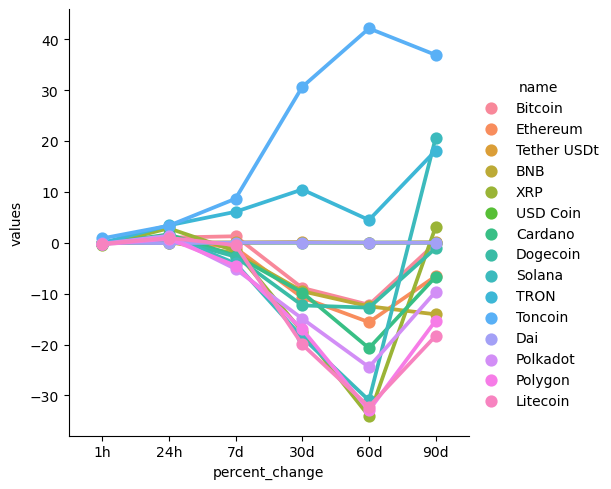

In [28]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df6, kind = 'point')

In [30]:
df7 = df[['name', 'quote.USD.price', 'timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,26582.430987,2023-09-15 07:43:56.670556+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

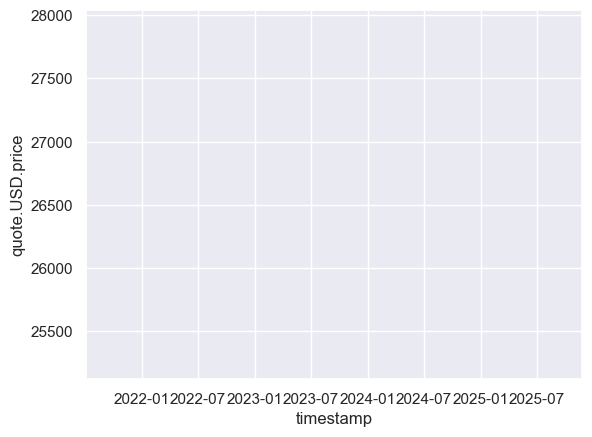

In [31]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x= 'timestamp', y = 'quote.USD.price', data = df7)